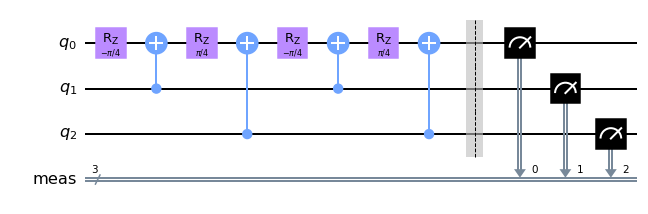

In [1]:
from qiskit import QuantumCircuit
from numpy import pi

qc = QuantumCircuit(3)
qc.ucrz([0,0,0,-pi], [1,2], [0])
qc.measure_all()
qc.decompose().decompose().draw()

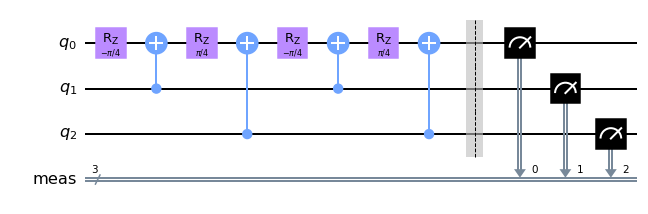

In [7]:
qc_decomposed = qc.decompose().decompose()
qc_decomposed.draw()

In [8]:
from qiskit_ibm_runtime import IBMRuntimeService

service = IBMRuntimeService()

from qiskit_ibm_runtime import IBMSampler

sampler_factory = IBMSampler(service=service)

with sampler_factory(circuits=[qc_decomposed]) as sampler:
    result = sampler(circuit_indices=[0], shots=1000)
    print(result)

SamplerResult(quasi_dists=[{'0': 1.0}], metadata=[{'header_metadata': None, 'shots': 1000}])


In [13]:
from qiskit.providers.aer import AerSimulator
from qiskit import transpile

simulator = AerSimulator()
qc_transpiled = transpile(qc, simulator)
job = simulator.run(qc_transpiled)

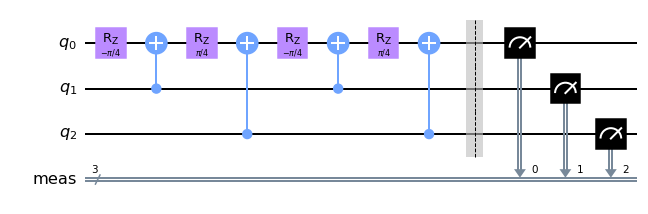

In [12]:
qc_transpiled.draw()

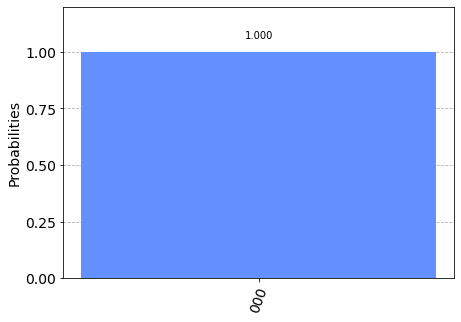

In [14]:
from qiskit.tools.visualization import plot_histogram

plot_histogram(job.result().get_counts())

In [16]:
from qiskit import QuantumCircuit
from numpy import pi
from qiskit.providers.ibmq.runtime import RuntimeEncoder, RuntimeDecoder
import json

qc = QuantumCircuit(3)
qc.ucrz([0,0,0,-pi], [1,2], [0])
qc.measure_all()

json_str = json.dumps(qc, cls=RuntimeEncoder)
json.loads(json_str, cls=RuntimeDecoder)

TypeError: __init__() takes 2 positional arguments but 5 were given

In [1]:
import io
import json
import base64
from numpy import pi

from qiskit.circuit import qpy_serialization
from qiskit import QuantumCircuit

qc = QuantumCircuit(3)
qc.ucrz([0,0,0,-pi], [1,2], [0])
qc.measure_all()

buf = io.BytesIO()
qpy_serialization.dump(qc, buf)
json_str = json.dumps({
    'circuits': base64.b64encode(buf.getvalue()).decode('utf8')
})
circuit_json = json.loads(json_str)
qpy_file = io.BytesIO(base64.b64decode(circuit_json["circuits"]))
circuit = qpy_serialization.load(qpy_file)[0]

TypeError: __init__() takes 2 positional arguments but 5 were given

In [ ]:
import io
import json
import base64

from qiskit.circuit import qpy_serialization

buf = io.BytesIO()
qpy_serialization.dump(qc, buf)
json_str = json.dumps({
    'circuits': base64.b64encode(buf.getvalue()).decode('utf8')
})
circuit_json = json.loads(json_str)
qpy_file = io.BytesIO(base64.b64decode(circuit_json["circuits"]))
circuit = qpy_serialization.load(qpy_file)[0]

In [5]:
import qiskit.tools.jupyter
%qiskit_version_table

In [6]:
from qiskit_ibm_runtime import IBMRuntimeService

service = IBMRuntimeService()

In [9]:
service.jobs(pending=False)

TypeError: __init__() takes 2 positional arguments but 5 were given